REMARQUES / COMMENTAIRES / CHOSES A MODIFIER :
===============

1. Dgo : 
    - ajouter corpus na
    - renommer corpus po
    - refaire corpus avec vrai micro
    - demander a po de refaire "plus bas"
2. Benji : 
    - pour le rapport expliquer ce que contiennent nos différents corpus
    
3. a qui veut :
    - faire une fonction qui compte le nombre de fichier wav

# TP1 de MCS

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import random
import librosa

## Partie I

In [2]:
def DTW(w0, w1, w2, seq1, seq2, d):
    I, J = seq2.shape[0], seq1.shape[0]
    g = np.empty((I+1,J+1))
    g.fill(None)

    g[0][0] = 0


    for j in range(1,J+1):
        g[0][j] = np.Infinity

    for i in range(1,I+1):
        g[i][0] = np.Infinity
        for j in range(1,J+1):
            g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)


#     print(g)
    score = g[I][J]/(I+J)
#     print(f'score: {score}')

    return score 

Définition des fonctions de distance

In [3]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [ ]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

Test avec l'exemple de l'exercice **2.1**

In [ ]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

Test avec l'exemple de l'exercice **2.2**

In [ ]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

Test avec l'exemple de l'exercice **2.3**

In [ ]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [ ]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

*Question 2.*

In [ ]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

## Partie II

In [6]:
m1, sr_m1 = librosa.load("corpus_test/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus_dgo/non_bruite/M20_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [ ]:
print(mfcc_m1.transpose().shape)
print(mfcc_m1.transpose())

In [ ]:
print(mfcc_f1)

In [ ]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [7]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_dgo_test_nb = ['M%.2d'%i for i in range(20,21)]
IDs_M_dgo_test_b = ['M%.2d'%i for i in range(21,22)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_reference = ['M%.2d'%i for i in range(1,2)]
IDs_F_reference = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_po = ['M%.2d'%i for i in range(1,2)]

IDs_F_na = ['F%.2d'%i for i in range(1,2)]

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test
IDs_dgonb = IDs_M_dgo_test_nb
IDs_dgob = IDs_M_dgo_test_b
IDs_reference = IDs_M_reference + IDs_F_reference


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test,
        "diegonb": IDs_dgonb,
        "diegob": IDs_dgob,
       "reference" : IDs_reference, # M01 en attendant de trouver mieux
       "po" : IDs_M_po,
       "feminin" : IDs_F_na
      }

#### Fonction de génération du chemin d'un fichier (Linux)

In [8]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
    elif typeSon == "diegonb":
        chemin = "corpus_dgo/non_bruite"
    elif typeSon == "diegob":
        chemin = "corpus_dgo/bruite"
    elif typeSon == "reference":
        chemin = "corpus_reference"
    elif typeSon == "po":
        chemin = "corpus_po"
    elif typeSon == "feminin":
        chemin = "corpus_feminin"
        
    chemin += f"/{ID}_{action}.wav"
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [9]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

In [ ]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

In [ ]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=12)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [10]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = []

    max_details_len = 0
    cpt = 0
    for typeSon in IDs:
        if filepath.split("/")[0].split("_")[-1] != list(IDs.keys())[cpt]:
            print(f"{cpt} / {len(IDs) - 1}")
            cpt += 1
            for ID in IDs[typeSon]:
                for action in actions:
                    filename = gen_path(typeSon, ID, action)
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=12)

                    action_details = f"{typeSon} {action} ({ID})" 
                    action_details = filename 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, round(DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect), 3)))


    results.sort(key=lambda k:k[1])

#     for i, (action, result) in enumerate(results):
#         print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
#     print()

#     print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')
    
    return results


In [ ]:
action_to_find = gen_random_path("po")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [11]:
def compare_mfcc_voices(filepath, affichage = True):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                y, sr = librosa.load(filename)

                mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                n_mfcc=12)

                action_details = f"{typeSon} {ID}"
                action_display = action_details +" "+ action

                if len(action_display)+1 > max_details_len:
                    max_details_len = len(action_display)

                dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                if dtw_score < dtw_min_score:
                    dtw_min_score = dtw_score
                    results[action_details] = (action, dtw_min_score)
    
    if affichage:
        for key in sorted(results.keys(), key=lambda k: results[k][1]):
            action, result = results[key]
            action_dsp = f'{key}: {action}'
            print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
            
    return sorted(results.keys(), key=lambda k: results[k][1])
    
   

In [ ]:
action_to_find = gen_random_path("po")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

### Test avec le corpus de voix perso

In [ ]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

In [ ]:
import time


action_to_find = gen_random_path("diegob")


print(action_to_find, end="\n\n")

debut=time.time()
results = compare_mfcc_voices(action_to_find, False)
fin= time.time()
print(fin - debut)

print(results)

choisir quoi comme base de référence ?

In [12]:
def compare_mfcc_to_reference(path_action_to_find, references, affichage = True):
    """
    On fixe un ensemble de fichier de référence (M01 par exemple) 
    et on donne a notre fonction une action de test (path_action_to_find).
    Cette fonction retourne les différents score de la DTW entre notre 
    action de test et les actions de notre corpus de référence.    
    
    """
    reference_typeSon, reference_ID = references
    y_son, sr_son = librosa.load(path_action_to_find)
    
    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=12)

    results = []

    max_details_len = 0 
    dtw_min_score = 10**5
    dtw_min_action = ""
    
    for action in actions:
        filename = gen_path(reference_typeSon, reference_ID, action)
        y, sr = librosa.load(filename)
        mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=12)
        action_details = f"{reference_typeSon} {reference_ID}"
        action_display = action_details +" "+ action
        dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)
        results.append((action, dtw_score))
    
    return sorted(results, key=lambda x : x[1])



In [ ]:
action_to_find = gen_random_path("diegonb")
print(action_to_find, end="\n\n")

z = compare_mfcc_to_reference(action_to_find, ["reference", "M01"])
df = pd.DataFrame(z, columns =['action de réference', 'score']) 
df

In [ ]:
# référence M01, test M02

actions_to_find = get_all_actions_from_path("po")[0]
n = len(actions)
for action in actions_to_find:
    print(f"{action.split('/')[-1].split('_')[-1].split('.')[0]} : ")
    z = compare_mfcc_to_reference(action, ["reference", "M01"])
    df = pd.DataFrame(z, columns =['', ''])
    print(df.head(3))
    print()
# a completer 

In [13]:
def get_all_actions_from_path(typeSon):
    """
    Retourne tous les fichiers d'un typeSon (['nonbruite', 'bruite', 'test', 'diegonb', 'diegob'])" 
    """
    selected_IDs = IDs[typeSon]
    return [[gen_path(typeSon, selected_IDs[j], actions[i]) for i in range(len(actions))] for j in range(len(selected_IDs))]

In [14]:
def all_actions_from_path_withID(typeSon, ID):
    return [gen_path(typeSon, ID, action) for action in actions]

In [14]:
references_actions = (get_all_actions_from_path("reference"))[0] # dans le cas du corpus référence vu qu'il n'y a qu'un ID (M01 pour l'instant pas besoin de flatten la liste, il suffit de récupérer le premier élément)
for action_de_ref in references_actions:
    print(action_de_ref)
print("\n"*2)
print("--"*20)
print("\n"*2)
flatten = lambda l: [e for m in l for e in m]
references_nonbruite = flatten(get_all_actions_from_path("nonbruite"))
for action_de_nb in references_nonbruite:
    print(action_de_nb)

testdiegonb_actions = get_all_actions_from_path("diegonb")[0]


corpus_reference/M01_arretetoi.wav
corpus_reference/M01_atterrissage.wav
corpus_reference/M01_avance.wav
corpus_reference/M01_decollage.wav
corpus_reference/M01_droite.wav
corpus_reference/M01_etatdurgence.wav
corpus_reference/M01_faisunflip.wav
corpus_reference/M01_gauche.wav
corpus_reference/M01_plusbas.wav
corpus_reference/M01_plushaut.wav
corpus_reference/M01_recule.wav
corpus_reference/M01_tournedroite.wav
corpus_reference/M01_tournegauche.wav



----------------------------------------



corpus/dronevolant_nonbruite/M01_arretetoi.wav
corpus/dronevolant_nonbruite/M01_atterrissage.wav
corpus/dronevolant_nonbruite/M01_avance.wav
corpus/dronevolant_nonbruite/M01_decollage.wav
corpus/dronevolant_nonbruite/M01_droite.wav
corpus/dronevolant_nonbruite/M01_etatdurgence.wav
corpus/dronevolant_nonbruite/M01_faisunflip.wav
corpus/dronevolant_nonbruite/M01_gauche.wav
corpus/dronevolant_nonbruite/M01_plusbas.wav
corpus/dronevolant_nonbruite/M01_plushaut.wav
corpus/dronevolant_nonbruite/M01_re

In [15]:
def buildConfusionMatrix(reference, test, affichage = False):
    corpus_reference, IDs_reference = reference 
    corpus_test, IDs_test = test
#     print(reference, test)
    cptbonnesrep = 0
    predictions = [] 
    vraisresultats = actions
#     corpusdetest = get_all_actions_from_path(corpus_test)[int(IDs_test[1:]) - 1]
    corpusdetest = all_actions_from_path_withID(corpus_test, IDs_test)
#     print("debut de la construction de la matrice de confusion ... \n |",end =" ")
    n = len(corpusdetest)
    for i in range(n):
        action_a_tester = corpusdetest[i]
#         print(f"{i} / {n}", end=" | ")
        z = compare_mfcc_to_reference(action_a_tester, [corpus_reference, IDs_reference])[0]
        predictions.append(z[0])
        if z[0] == actions[i]:
            cptbonnesrep+=1
#     print("fin de la construction.")
    

#     print(f"Sur {len(actions)} actions testés, on a obtenu {cptbonnesrep} bonnes réponses. \n SCORE = {round(cptbonnesrep / len(actions),2)}%")
    return confusion_matrix(actions, predictions), cptbonnesrep

def drawConfusionMatrix(confusion_matrix, infos, score):
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in actions],
                      columns = [i for i in actions])
    plt.figure(figsize=(7,7))
    print(f"score : {round(score / 13 * 100, 2)}")
    sn.heatmap(df_cm, annot=True).set_title(f"Comparaison entre {infos[0]} et {infos[1]} ")

Matrice de confusion :

In [16]:
cfsm, score = buildConfusionMatrix(["nonbruite", "M01"], ["nonbruite", "M02"]) # corpus de réference : "nonbruit", corpus de test : "test"

score : 84.62


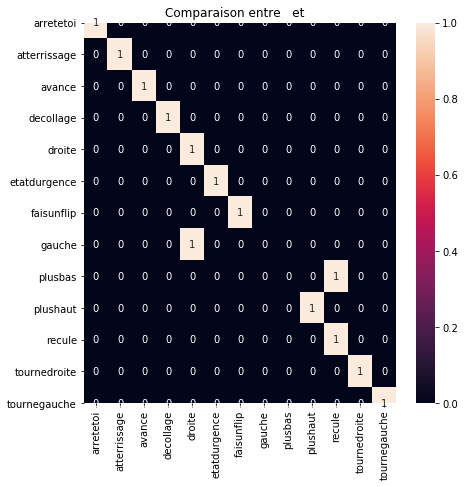

In [17]:
drawConfusionMatrix(cfsm, "      ", score)

Partie III, ACP

Réduction de dimension par $ACP$

In [18]:
def moyenneMfccs(corpusReference):
    """
    Cette fonction créer la matrice qui contient pour la colonne i, un vecteur de dimension 12 qui correspond à la moyenne colonne par colonne de la mfcc associée
    Input : Liste des 13 actions (.wav), ce corpus représente notre base de référence (définie arbitrairement)
    Output : Matrice numpy (12,13)
    """
    L = []
    for e in corpusReference:
        m1, sr_m1 = librosa.load(e)
        mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
        n_mfcc=12)
        L.append(np.mean(mfcc_m1.transpose(), axis = 0))
    return np.asarray(L)
 
# on récupère la matrice qui pour la ligne i, contient le vecteur de dimension 12 qui est la moyenne colonne par colonne de l'action i.
I = moyenneMfccs(all_actions_from_path_withID("nonbruite", "M01")).transpose()
scaler = StandardScaler()
scaler.fit(I)
I_center = scaler.transform(I) # on centre les données
pca = PCA(n_components=3)
P = pca.fit_transform(I_center).transpose() # réduction en dimension 3
print(P.shape)

(3, 12)


In [19]:
def build_set_for_suppervisedlearning(typeSon):
    trainingSet = []
    all_ids = IDs[typeSon]
    
    for i in range(len(all_ids)):
        temp = moyenneMfccs(all_actions_from_path_withID(typeSon, all_ids[i])).transpose()
        trainingSet.extend((P @ temp).transpose())
    
    return np.array(trainingSet)

def build_training_set_answers(typeSon):
        
        #Construction des réponses (apprentissage supervisé)
        suppervised = []
        for ID in IDs[typeSon]:
            suppervised.extend(all_actions_from_path_withID(typeSon, ID))
        return suppervised

In [20]:
# remarque : si on utilise nonbruité pour l'apprentissage et référence (qui est un sous ensemble de nonbruité) 
# pour le test, bonne nouvelle on obtient 13 / 13. Par contre si on prend autre chose pour le test les résultats
# sont (assez) mauvais.
def kppv(training_set, suppervied_answers, prediction_set):
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(training_set, suppervied_answers) 
    L, R = [], []
    res = neigh.predict(prediction_set)
    print(res)
    cpt = 0
    for pred_i, res_i in list(zip(res, actions)):
        left, right = pred_i.split('/')[-1].split('.')[0].split('_')[-1], res_i 
        L.append(left)
        R.append(right)
        if left == right:
            cpt+=1
    return list(zip(R, L)), cpt

In [25]:
training_set, suppervied_answers = build_set_for_suppervisedlearning("nonbruite"), build_training_set_answers("nonbruite")
prediction_set = build_set_for_suppervisedlearning("test")
print(prediction_set)
print(training_set.shape, " == ", len(suppervied_answers))

[[-4.4059795e+03 -1.9440523e+01 -2.3336010e+00]
 [-4.0064146e+03 -3.1612209e+01  3.3588266e+00]
 [-4.5032964e+03 -2.2214989e+01 -7.1561661e+00]
 [-4.5635786e+03 -1.4256809e+01  4.8138471e+00]
 [-4.8748052e+03 -9.2216492e-01 -4.6633720e+00]
 [-4.1439980e+03 -2.7211578e+01 -2.9837613e+00]
 [-4.6372588e+03 -1.5607912e+01  1.4325920e+00]
 [-4.3945537e+03 -9.5756292e+00  1.3166187e+00]
 [-4.7205391e+03 -9.9452000e+00  8.2798392e-01]
 [-4.8703838e+03  2.9133606e-01  2.1026886e+00]
 [-4.7011216e+03 -1.1765324e+01  3.9437225e+00]
 [-4.3505747e+03 -1.6823050e+01 -3.9336448e+00]
 [-4.0571982e+03 -3.0997574e+01  9.4378829e-01]]
(234, 3)  ==  234


In [26]:
D, cpt = kppv(training_set, suppervied_answers, prediction_set)
print("score final : ", cpt, " / 13")
df = pd.DataFrame(D, columns=["Actions", "Prédictions"])
df.style.apply(lambda x: ["background: yellow" if x.iloc[1] == x.iloc[0] else "" for v in x], axis = 1)

['corpus/dronevolant_nonbruite/M07_gauche.wav'
 'corpus/dronevolant_nonbruite/M07_etatdurgence.wav'
 'corpus/dronevolant_nonbruite/M10_decollage.wav'
 'corpus/dronevolant_nonbruite/M03_atterrissage.wav'
 'corpus/dronevolant_nonbruite/M08_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M07_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M10_faisunflip.wav'
 'corpus/dronevolant_nonbruite/M07_gauche.wav'
 'corpus/dronevolant_nonbruite/M10_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M08_tournegauche.wav'
 'corpus/dronevolant_nonbruite/M07_arretetoi.wav'
 'corpus/dronevolant_nonbruite/M10_atterrissage.wav'
 'corpus/dronevolant_nonbruite/M07_tournegauche.wav']
score final :  3  / 13


,Actions,Prédictions
0,arretetoi,gauche
1,atterrissage,etatdurgence
2,avance,decollage
3,decollage,atterrissage
4,droite,tournegauche
5,etatdurgence,tournegauche
6,faisunflip,faisunflip
7,gauche,gauche
8,plusbas,tournegauche
9,plushaut,tournegauche


In [21]:
colors = ["black","slategrey","blue","lightblue","cyan","Green","lightgreen","yellow","brown","orange","red","purple","pink"]

def plot_training_data3D(training_set):
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]

    fig = plt.figure()
    nlines, nrows = 7, 2

    fig = plt.figure(figsize=(20,50))

    for i in range(n):
        j = fig.add_subplot(nlines, nrows,i + 1, projection="3d")
        j.set_xlabel('X Label')
        j.set_ylabel('Y Label')
        j.set_zlabel('Z Label')
        j.set_ylim([-40,30])
        j.set_xlim([-7000,-4000])
        j.set_zlim([-8,4])

        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        j.scatter(x, y, z, c=colors[i], label=actions[i], s = 100, edgecolors='black')
        j.set_title("Données d'apprentissage pour : " + actions[i])
        j.legend(loc='center left', prop={'size': 15})
    plt.show()

<Figure size 432x288 with 0 Axes>

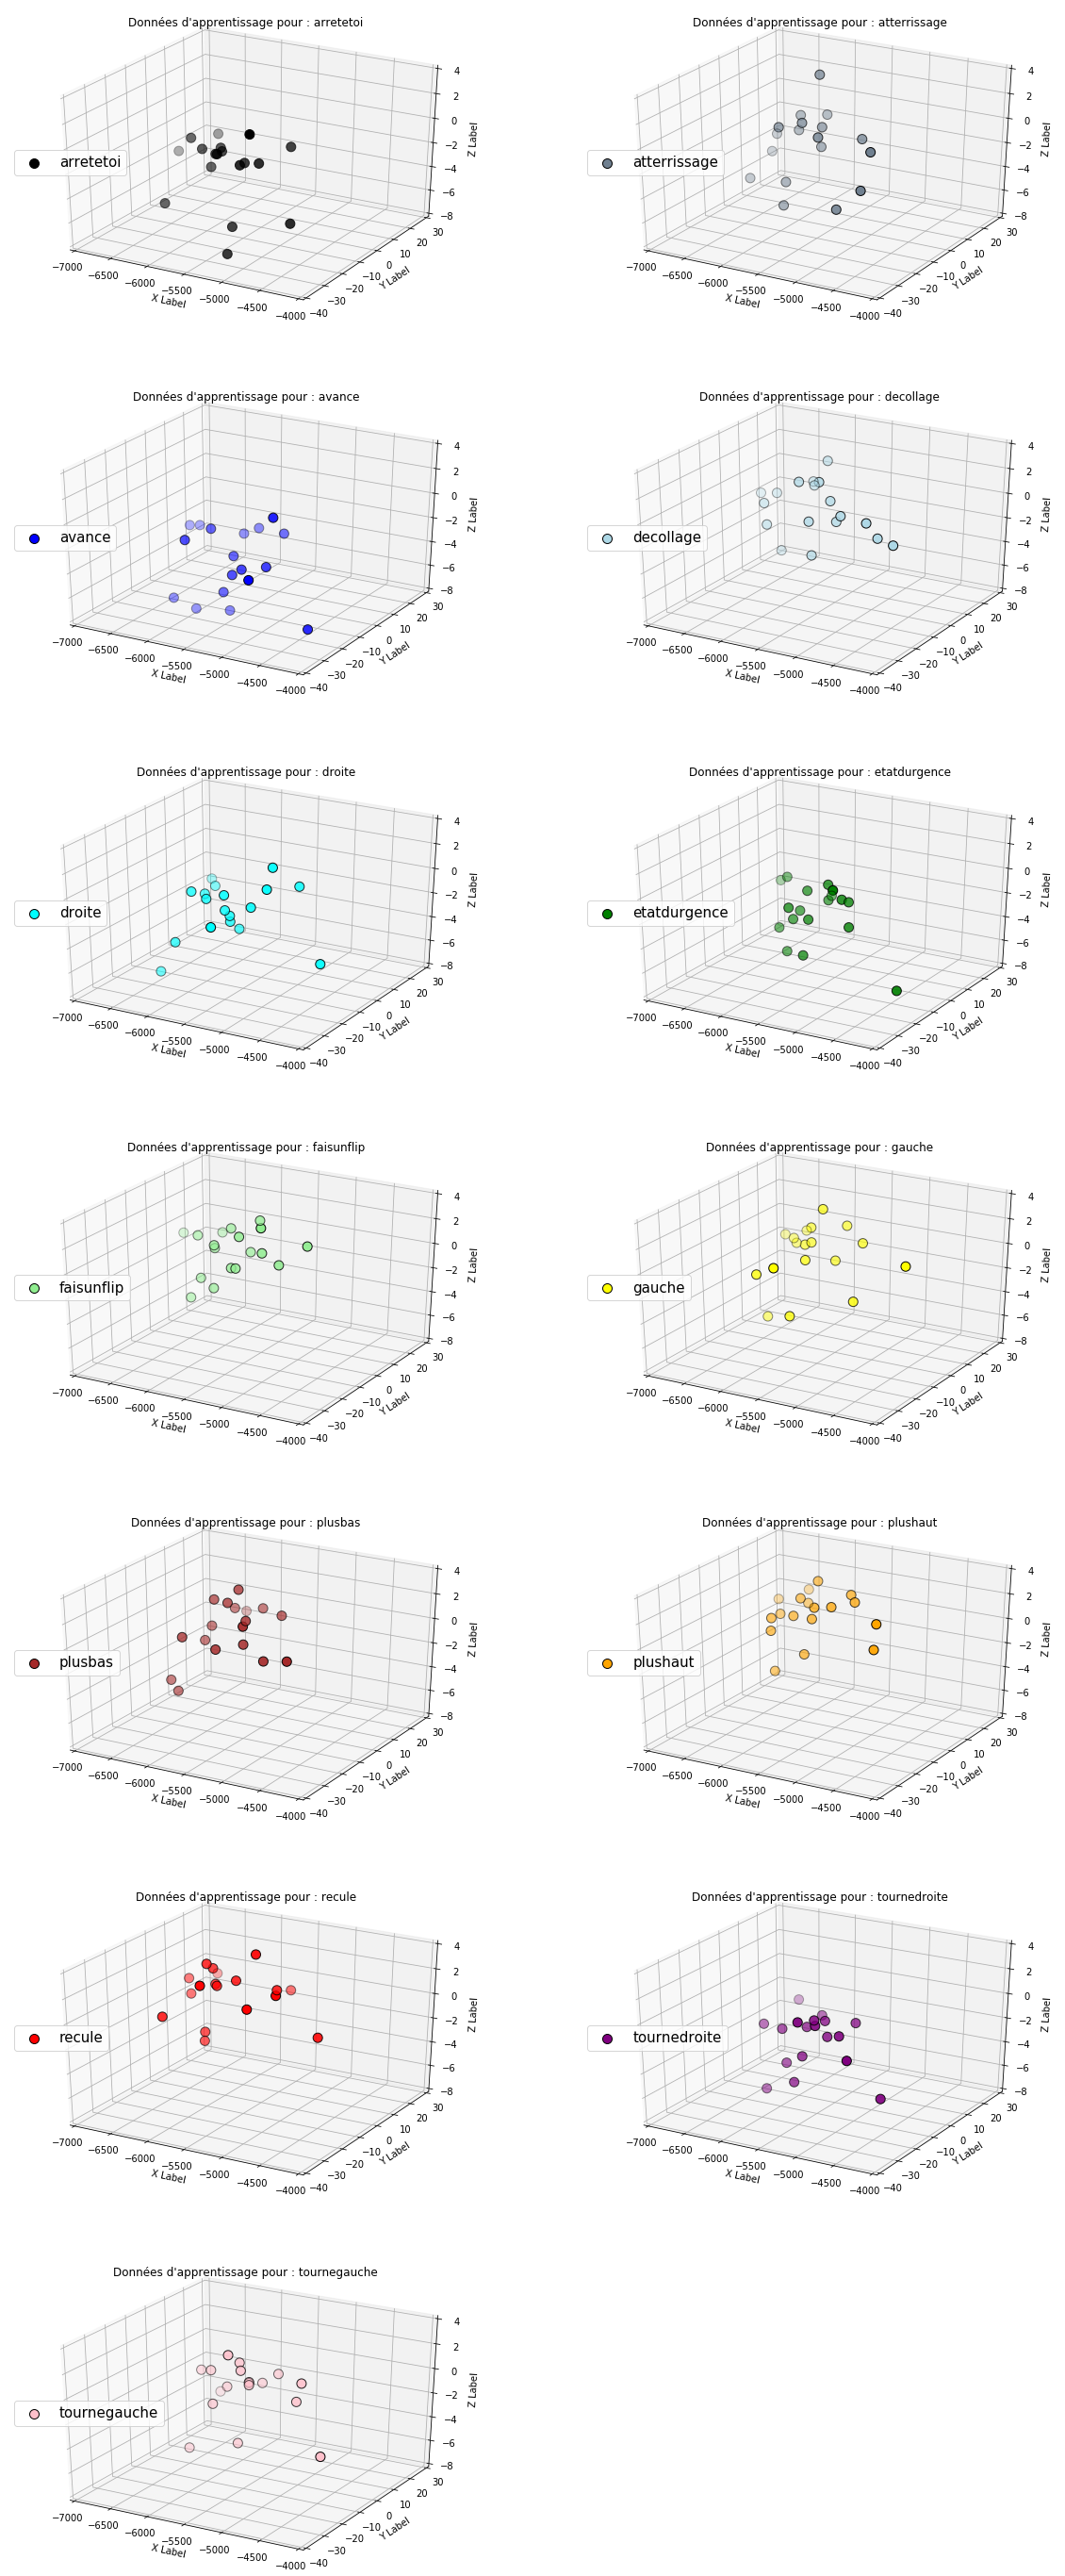

In [27]:
plot_training_data3D(training_set)

In [28]:
def plot_training_and_prediction_data3D(training_set, prediction_set, size_dots_training_set, size_dots_prediction_set):
    
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]
    
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig = plt.figure(figsize=(20,40))
    
    #### Plot training data + prediction data ####
    
    ax = fig.add_subplot(gs[0, :], projection="3d")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax.scatter(x,y,z, c=colors[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")

    xpredict, ypredict, zpredict = prediction_set[:,0], prediction_set[:,1], prediction_set[:,2]
    for i in range(n):
        ax.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax.legend(loc='center left', prop={'size': 15})    
    ax.set_title("Données d'apprentissage ET données de tests")

    
    
    
    
    #### Plot training data ####

    fig = plt.figure(figsize=(20,20))
    ax2 = fig.add_subplot(gs[1,0], projection="3d")
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_title("Données d'apprentissage")


    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax2.scatter(x,y,z, c=colors[i], label=actions[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")
        ax2.legend(loc='center left', prop={'size': 15})


    
    
    #### prediction data ####

    ax3 = fig.add_subplot(gs[1,1], projection="3d")
    ax3.set_xlabel('X Label')
    ax3.set_ylabel('Y Label')
    ax3.set_zlabel('Z Label')
    ax3.set_title("Données de tests")

    for i in range(13):
        ax3.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax3.legend(loc='center left', prop={'size': 15})    

    plt.show()

<Figure size 432x288 with 0 Axes>

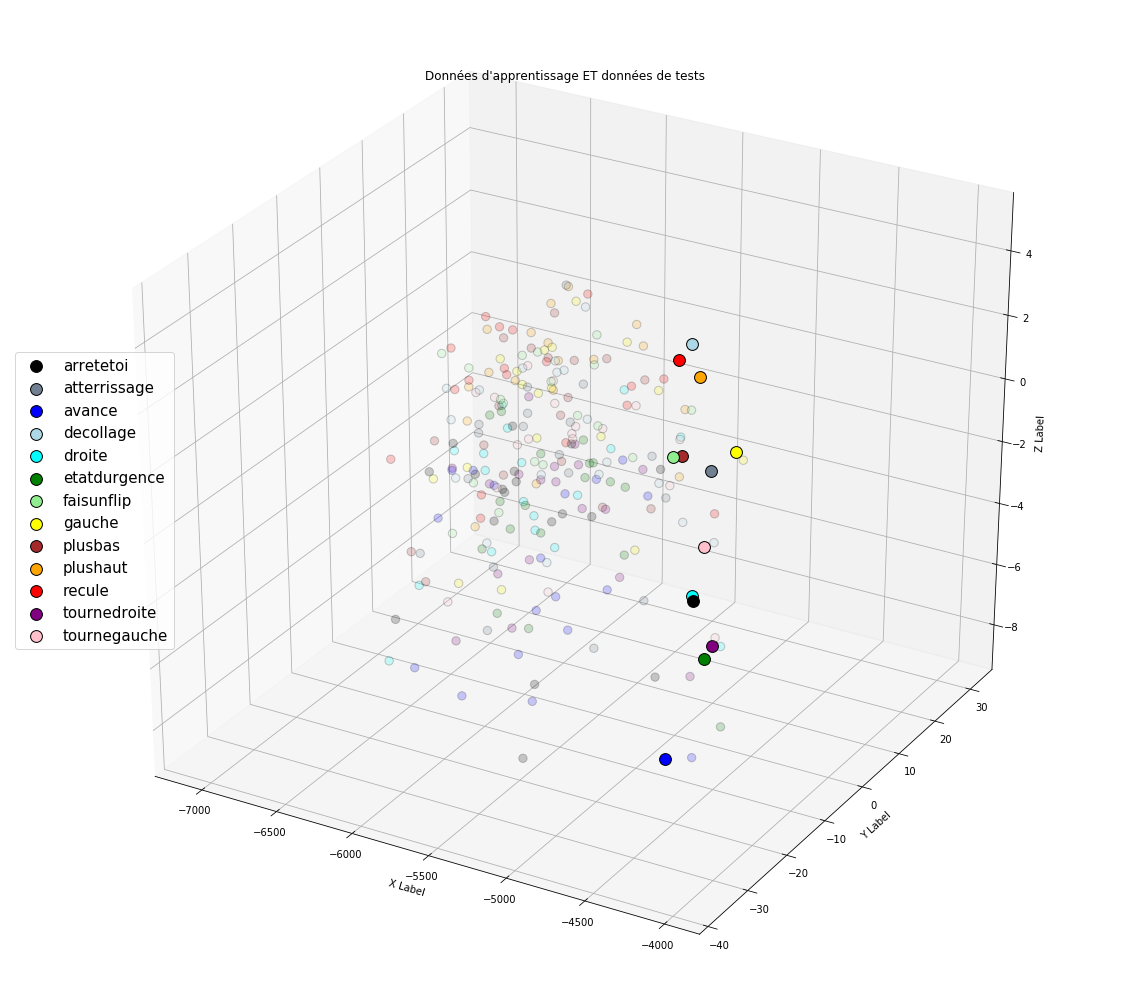

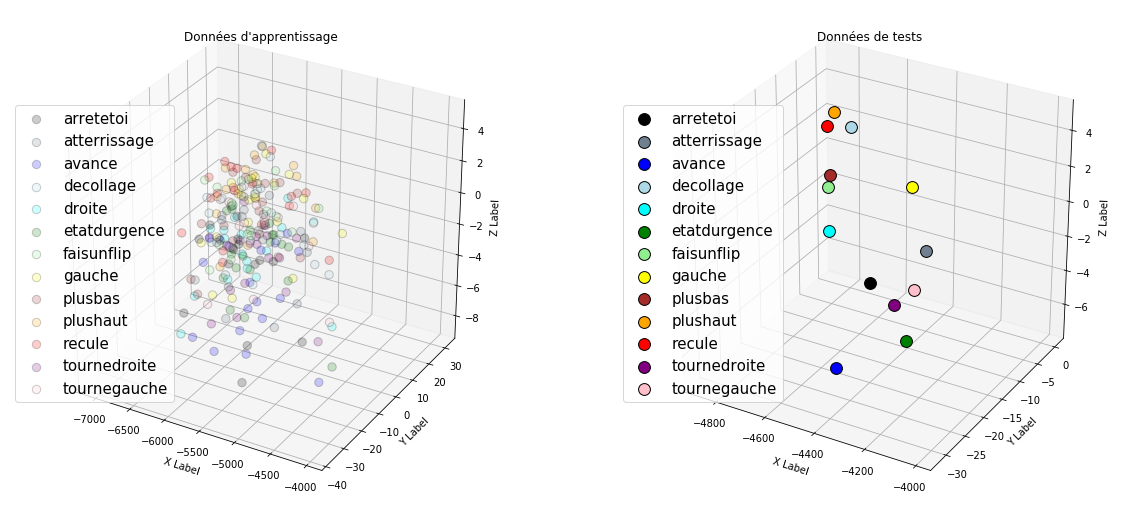

In [29]:
plot_training_and_prediction_data3D(training_set, prediction_set, 70, 140)

In [30]:
training_set, suppervied_answers = build_set_for_suppervisedlearning("nonbruite"), build_training_set_answers("nonbruite")
prediction_set = build_set_for_suppervisedlearning("test")
print(training_set.shape, " == ", len(suppervied_answers))

KeyboardInterrupt: 

In [ ]:
D, cpt = kppv(training_set, suppervied_answers, prediction_set)
print("score final : ", cpt, " / 13")
df = pd.DataFrame(D, columns=["Actions", "Prédictions"])
df.style.apply(lambda x: ["background: yellow" if x.iloc[1] == x.iloc[0] else "" for v in x], axis = 1)


In [ ]:
def plot_training_data3D(training_set):
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]

    fig = plt.figure()
    nlines, nrows = 7, 2

    fig = plt.figure(figsize=(20,50))

    for i in range(n):
        j = fig.add_subplot(nlines, nrows,i + 1, projection="3d")
        j.set_xlabel('X Label')
        j.set_ylabel('Y Label')
        j.set_zlabel('Z Label')
        j.set_ylim([-40,30])
        j.set_xlim([-7000,-4000])
        j.set_zlim([-8,4])

        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        j.scatter(x, y, z, c=colors[i], label=actions[i], s = 100, edgecolors='black')
        j.set_title("Données d'apprentissage pour : " + actions[i])
        j.legend(loc='center left', prop={'size': 15})
    plt.show()

In [ ]:
plot_training_data3D(training_set)

In [ ]:
def plot_training_and_prediction_data3D(training_set, prediction_set, size_dots_training_set, size_dots_prediction_set):
    
    n = len(actions)
    data_to_plot = [training_set[i::n] for i in range(n)]
    colors = ["black","slategrey","blue","lightblue","cyan","Green","lightgreen","yellow","brown","orange","red","purple","pink"]
    
    fig = plt.figure(constrained_layout=True)
    gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    fig = plt.figure(figsize=(20,40))
    
    #### Plot training data + prediction data ####
    
    ax = fig.add_subplot(gs[0, :], projection="3d")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax.scatter(x,y,z, c=colors[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")

    xpredict, ypredict, zpredict = prediction_set[:,0], prediction_set[:,1], prediction_set[:,2]
    for i in range(n):
        ax.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax.legend(loc='center left', prop={'size': 15})    
    ax.set_title("Données d'apprentissage ET données de tests")

    
    
    
    
    #### Plot training data ####

    fig = plt.figure(figsize=(20,20))
    ax2 = fig.add_subplot(gs[1,0], projection="3d")
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_title("Données d'apprentissage")


    for i in range(n):
        x, y, z = data_to_plot[i][:,0], data_to_plot[i][:,1], data_to_plot[i][:,2]
        ax2.scatter(x,y,z, c=colors[i], label=actions[i], s=size_dots_training_set, alpha=0.20, edgecolors="black")
        ax2.legend(loc='center left', prop={'size': 15})


    
    
    #### prediction data ####

    ax3 = fig.add_subplot(gs[1,1], projection="3d")
    ax3.set_xlabel('X Label')
    ax3.set_ylabel('Y Label')
    ax3.set_zlabel('Z Label')
    ax3.set_title("Données de tests")

    for i in range(13):
        ax3.scatter(xpredict[i], ypredict[i], zpredict[i], c=colors[i], label=actions[i], s=size_dots_prediction_set, edgecolors="black")

    ax3.legend(loc='center left', prop={'size': 15})    

    plt.show()

In [ ]:
plot_training_and_prediction_data3D(training_set, prediction_set, 70, 140)

In [ ]:
# diego : étude homme femme + comparaison KPPV 
# benji : étude voix benji + manip des données

Sujet d'étude : Comparaison voix homme / femme 
======

Dans cette étude nous comparerons :
     1. Un corpus de test de 13 actions dictées par une voix masculine AVEC un corpus de référence
         1.1 homme vs non bruité 
             - faire des exemples PUIS calcul général (corpus test vs tous les corpus non bruités)  
         1.2 homme vs bruite
             - faire des exemples PUIS calcul général (corpus test vs tous les corpus non bruités)  
     2. Un corpus de test de 13 actions dictées par une voix feminine AVEC un corpus de référence
         - pareil que au dessus
     
 Le corpus de référence contient des voix féminines, des voix masculines, des voix bruités et non bruités.

Dans cette étude nous comparerons :
     1. Un corpus de test de 13 actions dictées par une voix masculine AVEC
         - le corpus de base non bruité
         - le corpus de base bruité
         - le corpus perso non bruité
         - le corpus perso bruité
     2. faire pareil pour les femmes
         
 Le corpus de référence contient des voix féminines, des voix masculines, des voix bruités et non bruités.

Chargement des corpus masculin et féminin

In [ ]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]
actions_male = get_all_actions_from_path("po")[0] 
# female = get_all_actions_from_path("na")[0]
print(actions_male)

1-) DTW
====

Etude **voix masculine** 
----

Prenons au hasard 4 items de ce corpus (2 items homme et 2 items femme) et traçons leur matrices de confusion 

In [31]:
homme_items = [x for x in IDs["nonbruite"] if x[0] == "M" ]
femme_items  = [x for x in IDs["nonbruite"] if x[0] == "F" ]
rng_items_id = random.sample(range(0, len(homme_items)), 2) + random.sample(range(len(homme_items), len(homme_items) + len(femme_items)), 2)
rng_items = list(map(lambda x : IDs["nonbruite"][x] , rng_items_id))
print(rng_items)


['M02', 'M11', 'F01', 'F02']


On dessine les 4 matrices de confusions

score : 15.38
score : 7.69
score : 15.38
score : 7.69


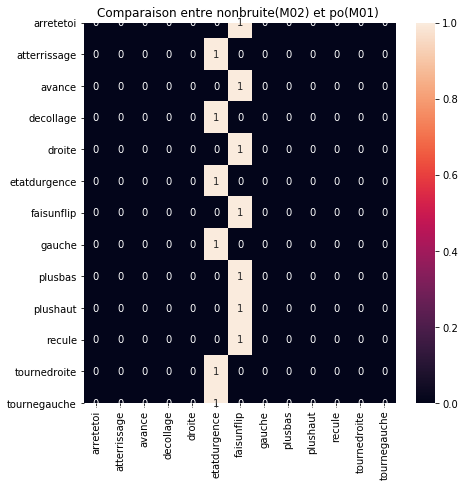

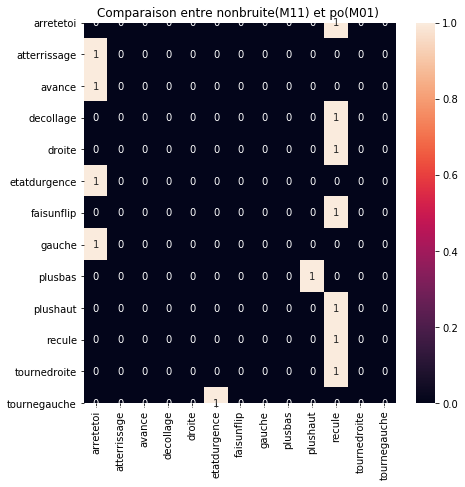

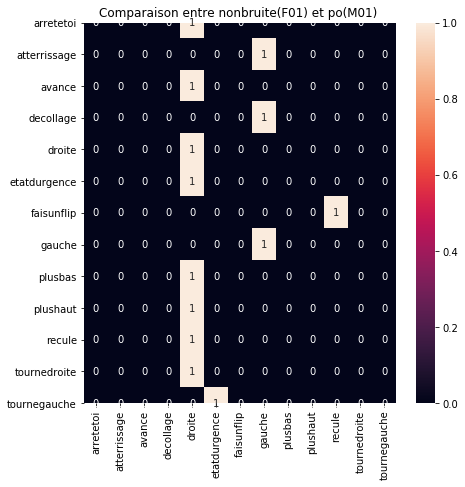

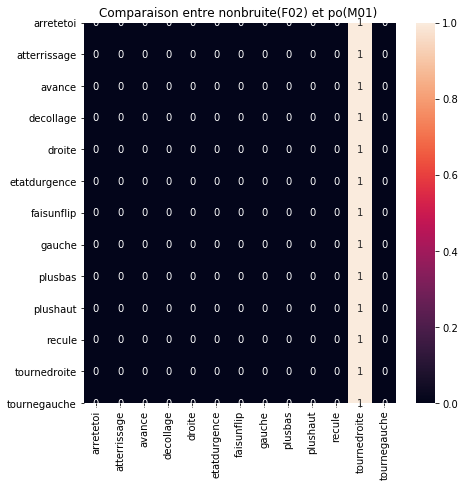

In [32]:
for item in rng_items:
    cfsm, cpt = buildConfusionMatrix(["nonbruite", item], ["po", "M01"]) # corpus de réference : "nonbruit", corpus de test : "test"
    drawConfusionMatrix(cfsm, [f"nonbruite({item})", "po(M01)"], cpt)

Comparaison corpus de test avec items homme non bruité

In [33]:
def comparaison(CorpusTest, typeCorpusRef, items,):
    typeCorpusTest, acteurCorpusTest = CorpusTest
    scores = []
    for item in items:
        _, s = buildConfusionMatrix([typeCorpusRef, item], [typeCorpusTest, acteurCorpusTest])
        scores.append(s)
    score_moyen = int(sum(list(map(lambda x : int(x / 13 * 100), scores))) / len(scores)) + 1
    print(f"Avec notre corpus de test {typeCorpusTest}, en le comparant avec {typeCorpusRef} on obtient un score moyen de {score_moyen} %")
    return scores


In [34]:
homme_items = [x for x in IDs["nonbruite"] if x[0] == "M" ]
femme_items  = [x for x in IDs["nonbruite"] if x[0] == "F" ]

scores = comparaison(["po", "M01"], "nonbruite", homme_items)
scores = comparaison(["po", "M01"], "nonbruite", femme_items)
scores = comparaison(["po", "M01"], "bruite", IDs["bruite"])
scores = comparaison(["po", "M01"], "diegob", IDs["diegob"])
scores = comparaison(["po", "M01"], "diegonb", IDs["diegonb"])

Avec notre corpus de test po, en le comparant avec diegonb on obtient un score moyen de 16 %


KeyboardInterrupt: 

Etude **voix feminine** 
----

In [ ]:
for item in rng_items:
    cfsm, cpt = buildConfusionMatrix(["nonbruite", item], ["feminin", "F01"]) # corpus de réference : "nonbruit", corpus de test : "test"
    drawConfusionMatrix(cfsm, [f"nonbruite({item})", "feminin(M01)"], cpt)

In [ ]:
scores = comparaison(["feminin", "F01"], "nonbruite", homme_items)
scores = comparaison(["feminin", "F01"], "nonbruite", femme_items)
scores = comparaison(["feminin", "F01"], "bruite", IDs["bruite"])
scores = comparaison(["feminin", "F01"], "diegob", IDs["diegob"])
scores = comparaison(["feminin", "F01"], "diegonb", IDs["diegonb"])